In [1]:
%reload_ext autoreload
%autoreload 2
import sys
import os

sys.path.append("/is/sg2/jcheng/Dev/doi_solo/successor-features/src")
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

from experiment_aggregation import Experiment, ExperimentSummary

# set up matplotlib

import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots import figsizes, fontsizes

plt.rcParams.update(bundles.icml2022())

sizes = plt.rcParams.copy()

figsize_hhalf = sizes['figure.figsize'][0] / 2, sizes['figure.figsize'][1]
new_figsize = sizes['figure.figsize'][0], sizes['figure.figsize'][1] /2.0
sizes = figsizes.neurips2023(ncols=1)
new_figsize = sizes['figure.figsize'][0], sizes['figure.figsize'][1] /2.0
figsize_full = sizes['figure.figsize'][0], sizes['figure.figsize'][1]
figsize_75 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.75
figsize_25 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.25
figsize_40 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.4
figsize_30 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.3
figsize_70 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.7


# COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"

COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"


COLORS_FLOATING_POINT = [
    (0.368,0.507,0.71), # blue
    (0.881,0.611,0.142), # orange
    (.56,0.692,0.195), # green
    (0.923,0.386,0.209), # red
    (0.528,0.471,0.701), # purple
    (0.772,0.432,0.102), # brown
    (0.364,0.619,0.782) # cyan
]

# AL group color scheme
COLORS = []
for (r,g,b) in COLORS_FLOATING_POINT:
    # print("#%02x%02x%02x" % (int(r*255), int(g*255), int(b*255)))
    COLORS.append("#%02x%02x%02x" % (int(r*255), int(g*255), int(b*255)))





# basic

In [4]:
# data loading

path = '/is/rg/al/Data/solo12_data/blm_more_alpha_l0'
experiments = Experiment.extract_experiments([path], load_tensorboard=False, load_h5=True)
summary = ExperimentSummary(experiments, exclude_params=['solo_legged_gym.env_cfg.seed'])

for k in summary.experiments[0].values.keys():
    if 'avg_nearest' in k:
        print(k)


# 1st extrinsic reward, (None, 0.3, 0.3, None)
# 2nd extrinsic reward, (0.9, None, 0.6, None)
# 3rd extrinsic reward, (0.9, None, 0.6, None) - 1.0 l0 is broken,  (0.9, 0.6, None, None)


idx = (None, 0.3, 0.3, None)

def st(x, window=100):
    return np.convolve(x, np.ones(window)/window, 'valid') 



time_statistics_feature = summary.time_statistics('scalar/main/Feature/avg_nearest_dist_per_step', [idx])
time_statistics_return = summary.time_statistics('scalar/main/Constraint/avg_ext_values_rew0_skill1', [idx])


import numpy as np

def extract_mu_std(ts):
    """Returns last timestep."""
    return np.array([t['mu'][-1] for t in ts]),np.array([t['std'][-1] for t in ts])

##### change this with data #######

x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
# print(len(time_statistics_feature))
y = np.array([time_statistics_return[k]['mu'][-1] for k in time_statistics_return])
x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))
y_err = np.sqrt(np.array([time_statistics_return[k]['var'][-1] for k in time_statistics_return]))

a1 = np.array([k[0] for k in time_statistics_feature.keys()])
a2 = np.array([k[1] for k in time_statistics_feature.keys()])
a3 = np.array([k[2] for k in time_statistics_feature.keys()])
l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
cmap_l0 = {
    1.0: COLORS[0],
    2.0: COLORS[1],
    3.0: COLORS[2],
    4.0: COLORS[3]
}
l0_colors = [cmap_l0[l0] for l0 in l0_values]

####################################


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 324/324 [00:52<00:00,  6.12it/s]


scalar/main/Feature/avg_nearest_dist
scalar/main/Feature/avg_nearest_dist_per_step
Experiments Int64Index([94, 156, 209], dtype='int64') has 3 runs
Experiments Int64Index([119, 136, 215], dtype='int64') has 3 runs
Experiments Int64Index([173, 174, 293], dtype='int64') has 3 runs
Experiments Int64Index([24, 147, 299], dtype='int64') has 3 runs
Experiments Int64Index([17, 221, 290], dtype='int64') has 3 runs
Experiments Int64Index([66, 153, 314], dtype='int64') has 3 runs
Experiments Int64Index([86, 250, 262], dtype='int64') has 3 runs
Experiments Int64Index([58, 102, 223], dtype='int64') has 3 runs
Experiments Int64Index([8, 42, 98], dtype='int64') has 3 runs
Experiments Int64Index([107, 110, 282], dtype='int64') has 3 runs
Experiments Int64Index([73, 219, 269], dtype='int64') has 3 runs
Experiments Int64Index([167, 206, 292], dtype='int64') has 3 runs
Experiments Int64Index([94, 156, 209], dtype='int64') has 3 runs
Experiments Int64Index([119, 136, 215], dtype='int64') has 3 runs
Exper

### Big plots

In [49]:
import itertools
import matplotlib
# data
# define indexes that you want to plot here

skills = [1, 2, 3, 4, 5, 6, 7]
expert_return = [28, 36, 52]

def st(x, window=200):
    return np.convolve(x.flatten(), np.ones(window)/window, 'valid') 

for vary in [0, 1, 2]:
    figsize = figsize_full[0]*3, figsize_full[1]*9
    fig, axs = plt.subplots(9, 3, figsize=figsize)
    for kk, idx_ in enumerate(itertools.product([0.3, 0.6, 0.9], [0.3, 0.6, 0.9])):
        for rew_idx in range(3):
            
            ax = axs[kk, rew_idx]
            print(kk, rew_idx, idx_)

            idx = [None, None, None, None]
            idx[(1+vary)%3] = idx_[0]
            idx[(2+vary)%3] = idx_[1]
            idx = tuple(idx)


            # TODO take min over skills
            time_statistics_feature = summary.time_statistics('scalar/main/Feature/avg_nearest_dist_per_step', [idx], verbose=False, apply_func=st)
            
            time_statistics_return = [summary.time_statistics(f'scalar/main/Constraint/avg_ext_values_rew{rew_idx}_skill{skill}', [idx], apply_func=st, verbose=False) for skill in skills]
            # time_statistics_return = summary.time_statistics(f'scalar/main/Constraint/avg_ext_values_rew{rew_idx}_skill1', [idx], apply_func=st, verbose=False)

            # print(len(time_statistics_return))
            # for k in time_statistics_feature:
            #     print(k)
            #     print(time_statistics_feature[k]['mu'])
            #     print(time_statistics_feature[k]['var'])


            
            import numpy as np

            ##### change this with data #######

            x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
            x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))


            y = []
            y_err = []
            for i in range(len(skills)):
                y.append([time_statistics_return[i][k]['mu'][-1] for k in time_statistics_return[i]])
                y_err.append([time_statistics_return[i][k]['var'][-1] for k in time_statistics_return[i]])


            y = np.array(y)
            y_err = np.sqrt(np.array(y))

            y = np.mean(y, axis=0).squeeze() / expert_return[rew_idx]
            y_err = np.mean(y_err, axis=0).squeeze() / expert_return[rew_idx]

            # print(y.shape)
            # print(y_err.shape)

            a1 = np.array([k[0] for k in time_statistics_feature.keys()])
            a2 = np.array([k[1] for k in time_statistics_feature.keys()])
            a3 = np.array([k[2] for k in time_statistics_feature.keys()])
            l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
            cmap_l0 = {
                1.0: COLORS[0],
                2.0: COLORS[1],
                3.0: COLORS[2],
                4.0: COLORS[3]
            }
            l0_colors = [cmap_l0[l0] for l0 in l0_values]



            def scatter_pie_markers(x,y, c1, c2, c3, size=40, ax=None):

                # first define the ratios
                r1 = 0.33       # 20%
                r2 = r1 + 0.33  # 40%

                if ax is None:
                    ax = plt.gca()

                # calculate the points of the first pie marker
                #
                # these are just the origin (0,0) +
                # some points on a circle cos,sin
                x_ = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
                xy1 = np.column_stack([x_, y_])
                s1 = np.abs(xy1).max()

                x_ = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
                xy2 = np.column_stack([x_, y_])
                s2 = np.abs(xy2).max()

                x_ = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
                xy3 = np.column_stack([x_, y_])
                s3 = np.abs(xy3).max()

                ax.scatter(x, y, marker=xy1,
                        s=s1 ** 2 * size, facecolor=c1)
                ax.scatter(x, y, marker=xy2,
                        s=s2 ** 2 * size, facecolor=c2)
                return ax.scatter(x, y, marker=xy3,
                        s=s3 ** 2 * size, facecolor=c3)


            c = COLORS[0]

            cmap = matplotlib.colormaps['viridis'].resampled(8)


            for x_, y_, y_err_, x_err_, a1_, a2_, a3_, l0, l0_color in zip(x.reshape(-1, 1),y.reshape(-1,1),y_err.reshape(-1,1),x_err.reshape(-1,1), a1, a2, a3, l0_values, l0_colors):

                ax.errorbar(x_, y_, xerr=x_err_, yerr=y_err_, fmt='o', markersize=0.0, zorder=-1, c=l0_color)
                im = scatter_pie_markers(x_,y_, cmap(a1_), cmap(a2_), cmap(a3_), ax=ax)


                ax.annotate(f'{l0}', (x_+0.02,  y_+0.02), color=l0_color)




            # plot heatmap of the data
            ax.set_ylabel("Return")
            ax.set_xlabel("Diversity")
            ax.set_title("{idx}".format(idx=idx))
            import os

    fig.savefig(os.path.expanduser(f'~/icra2023/vdw_big_{vary}_vary.pdf'), bbox_inches='tight')
    plt.close()
    print('Plotted!')





0 0 (0.3, 0.3)
0 1 (0.3, 0.3)
0 2 (0.3, 0.3)
1 0 (0.3, 0.6)
1 1 (0.3, 0.6)
1 2 (0.3, 0.6)
2 0 (0.3, 0.9)
2 1 (0.3, 0.9)
2 2 (0.3, 0.9)
3 0 (0.6, 0.3)
3 1 (0.6, 0.3)
3 2 (0.6, 0.3)
4 0 (0.6, 0.6)
4 1 (0.6, 0.6)
4 2 (0.6, 0.6)
5 0 (0.6, 0.9)
5 1 (0.6, 0.9)
5 2 (0.6, 0.9)
6 0 (0.9, 0.3)
6 1 (0.9, 0.3)
6 2 (0.9, 0.3)
7 0 (0.9, 0.6)
7 1 (0.9, 0.6)
7 2 (0.9, 0.6)
8 0 (0.9, 0.9)
8 1 (0.9, 0.9)
8 2 (0.9, 0.9)
Plotted!
0 0 (0.3, 0.3)
0 1 (0.3, 0.3)
0 2 (0.3, 0.3)
1 0 (0.3, 0.6)
1 1 (0.3, 0.6)
1 2 (0.3, 0.6)
2 0 (0.3, 0.9)
2 1 (0.3, 0.9)
2 2 (0.3, 0.9)
3 0 (0.6, 0.3)
3 1 (0.6, 0.3)
3 2 (0.6, 0.3)
4 0 (0.6, 0.6)
4 1 (0.6, 0.6)
4 2 (0.6, 0.6)
5 0 (0.6, 0.9)
5 1 (0.6, 0.9)
5 2 (0.6, 0.9)
6 0 (0.9, 0.3)
6 1 (0.9, 0.3)
6 2 (0.9, 0.3)
7 0 (0.9, 0.6)
7 1 (0.9, 0.6)
7 2 (0.9, 0.6)
8 0 (0.9, 0.9)
8 1 (0.9, 0.9)
8 2 (0.9, 0.9)
Plotted!
0 0 (0.3, 0.3)
0 1 (0.3, 0.3)
0 2 (0.3, 0.3)
1 0 (0.3, 0.6)
1 1 (0.3, 0.6)
1 2 (0.3, 0.6)
2 0 (0.3, 0.9)
2 1 (0.3, 0.9)
2 2 (0.3, 0.9)
3 0 (0.6, 0.3)
3 1 (0.6, 0.3)
3 2 (0.

### Small plots

Experiments Int64Index([112, 195, 319], dtype='int64') has 3 runs
Experiments Int64Index([120, 137, 144], dtype='int64') has 3 runs
Experiments Int64Index([199, 235, 277], dtype='int64') has 3 runs
Experiments Int64Index([38, 177, 203], dtype='int64') has 3 runs
Experiments Int64Index([15, 169, 317], dtype='int64') has 3 runs
Experiments Int64Index([6, 142, 243], dtype='int64') has 3 runs
Experiments Int64Index([34, 265, 316], dtype='int64') has 3 runs
Experiments Int64Index([9, 178, 246], dtype='int64') has 3 runs
Experiments Int64Index([78, 236, 321], dtype='int64') has 3 runs
Experiments Int64Index([63, 69, 85], dtype='int64') has 3 runs
Experiments Int64Index([37, 231, 273], dtype='int64') has 3 runs
Experiments Int64Index([2, 21, 320], dtype='int64') has 3 runs
Experiments Int64Index([112, 195, 319], dtype='int64') has 3 runs
Experiments Int64Index([120, 137, 144], dtype='int64') has 3 runs
Experiments Int64Index([199, 235, 277], dtype='int64') has 3 runs
Experiments Int64Index([3

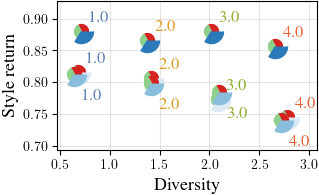

In [38]:

# data
# define indexes that you want to plot here
# 1st extrinsic reward, (None, 0.3, 0.3, None)
# 2nd extrinsic reward, (0.9, None, 0.6, None)
# 3rd extrinsic reward, (0.9, None, 0.6, None) - 1.0 l0 is broken,  (0.9, 0.6, None, None)

import itertools
import matplotlib
# data
# define indexes that you want to plot here

skills = [1, 2, 3, 4, 5, 6, 7]
expert_return = [28, 36, 52]

def st(x, window=200):
    return np.convolve(x.flatten(), np.ones(window)/window, 'valid') 

# idx =  (None, 0.6, 0.9, None)
# sizes = [3.0, 1.0, 1.0]
# rew = 0
# y_name = "Task return"

# idx =  (0.9, None, 0.9, None)
# sizes = [1.0, 3.0, 1.0]
# rew = 1
# y_name = "Regularizer return"

idx =  (0.9, 0.6, None, None)
sizes = [1.0, 1.0, 3.0]
rew = 2
y_name = "Style return"

time_statistics_feature = summary.time_statistics('scalar/main/Feature/avg_nearest_dist_per_step', [idx], apply_func=st)
# time_statistics_return = summary.time_statistics(f'scalar/main/Constraint/avg_ext_values_rew{rew}_skill{skill}', [idx])
time_statistics_return = [summary.time_statistics(f'scalar/main/Constraint/avg_ext_values_rew{rew}_skill{skill}', [idx], apply_func=st) for skill in skills]

fig_name = f'vdw_rainbow_rew{rew}'

import numpy as np

# def extract_mu_std(ts):
#     """Returns last timestep."""
#     return np.array([t['mu'][-1] for t in ts]),np.array([t['std'][-1] for t in ts])

##### change this with data #######

x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))

# y = np.array([st(time_statistics_return[k]['mu'])[-1] for k in time_statistics_return])
# y_err = np.sqrt(np.array([st(time_statistics_return[k]['var'])[-1] for k in time_statistics_return]))

y = []
y_err = []
for i in range(len(skills)):
    y.append([time_statistics_return[i][k]['mu'][-1] for k in time_statistics_return[i]])
    y_err.append([time_statistics_return[i][k]['var'][-1] for k in time_statistics_return[i]])


y = np.array(y)
y_err = np.sqrt(np.array(y))

y = np.mean(y, axis=0).squeeze() / expert_return[rew]
y_err = np.mean(y_err, axis=0).squeeze() / expert_return[rew]


a1 = np.array([k[0] for k in time_statistics_feature.keys()])
a2 = np.array([k[1] for k in time_statistics_feature.keys()])
a3 = np.array([k[2] for k in time_statistics_feature.keys()])
l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
cmap_l0 = {
    1.0: COLORS[0],
    2.0: COLORS[1],
    3.0: COLORS[2],
    4.0: COLORS[3]
}
l0_colors = [cmap_l0[l0] for l0 in l0_values]

####################################




# random scatter plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import itertools




def scatter_pie_markers(x,y, c1, c2, c3, size=100, ax=None, scales=[1, 1, 1]):

    # first define the ratios
    r1 = 0.33       # 20%
    r2 = r1 + 0.33  # 40%

    if ax is None:
        ax = plt.gca()

    # calculate the points of the first pie marker
    #
    # these are just the origin (0,0) +
    # some points on a circle cos,sin
    x_ = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 20)).tolist()
    y_ = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 20)).tolist()
    xy1 = np.column_stack([x_, y_])
    s1 = np.abs(xy1).max()
    # print(xy1)
    print(s1)

    x_ = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 20)).tolist()
    y_ = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 20)).tolist()
    xy2 = np.column_stack([x_, y_])
    s2 = np.abs(xy2).max()
    print(s2)

    x_ = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 20)).tolist()
    y_ = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 20)).tolist()
    xy3 = np.column_stack([x_, y_])
    s3 = np.abs(xy3).max()
    print(s3)

    ax.scatter(x, y, marker=xy1,
            s=size * scales[0], facecolor=c1)
    ax.scatter(x, y, marker=xy2,
            s=size * scales[1], facecolor=c2)
    return ax.scatter(x, y, marker=xy3,
            s=size * scales[2], facecolor=c3)

fig, ax = plt.subplots()

##### change this with data #######

# x,y = np.random.rand(20), np.random.rand(20)
# y_err = np.random.rand(20) * 0.1
# x_err = np.random.rand(20) * 0.1
# a1 = np.random.rand(20)
# a2 = np.random.rand(20)
# a3 = np.random.rand(20)

# l0_colors = np.random.randint(3, size=20)
# l0_values = [1.0, 2.0, 4.0]
# l0_values = np.array([l0_values[i] for i in l0_colors])
# l0_colors = np.array([COLORS[i] for i in l0_colors])

####################################



c = COLORS[0]

cmap = matplotlib.colormaps['viridis'].resampled(8)
# new cmap
# def cmap(x):
#     return {
#         0.3: COLORS[-3],
#         0.6: COLORS[-2],
#         0.9: COLORS[-1]
#     }[x]


cmap_a1 = matplotlib.colormaps['Reds'].resampled(8)
cmap_a2 = matplotlib.colormaps['Greens'].resampled(8)
cmap_a3 = matplotlib.colormaps['Blues'].resampled(8)


for x_, y_, y_err_, x_err_, a1_, a2_, a3_, l0, l0_color in zip(x.reshape(-1, 1),y.reshape(-1,1),y_err.reshape(-1,1),x_err.reshape(-1,1), a1, a2, a3, l0_values, l0_colors):

    # plt.errorbar(x_, y_, xerr=x_err_, fmt='o', markersize=0.0, zorder=-1, c=l0_color)
    # print(a1_)
    # im = scatter_pie_markers(x_,y_, cmap(a1_), cmap(a2_), cmap(a3_), ax=ax)
    im = scatter_pie_markers(x_,y_, cmap_a1(a1_/1.4), cmap_a2(a2_/1.4), cmap_a3(a3_/1.4), ax=ax, scales=sizes)
    print(a1_)
    print(a2_)
    print(a3_)
    if a3_>0.5 and a3_<0.7:
        ax.annotate(f'{l0}', (x_+.08,  y_-.04), color=l0_color, size=12)
    else:
        ax.annotate(f'{l0}', (x_+.08,  y_+.015), color=l0_color, size=12)


ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-0.04, ymax + 0.04)

xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin-0.06, xmax + 0.20)
yunit = (ymax - ymin) / 20
xunit = (xmax - xmin) / 20


# plot heatmap of the data
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel(y_name, fontsize=13)
ax.set_xlabel("Diversity", fontsize=13)
ax.set_axisbelow(True)
ax.grid(color='gray', alpha=0.2)


norm = matplotlib.colors.Normalize(vmin=0.2, vmax=1.0)
# fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax, orientation="vertical", label="$\\alpha$")

import os

fig.savefig(os.path.expanduser(f'~/icra2023/{fig_name}.pdf'), bbox_inches='tight')





In [ ]:
colors_float = []
for a in (0.3, 0.6, 0.9):
    colors_float.append(cmap(a))

In [ ]:
# float colors to hex colors
colors = []
for c in colors_float:
    colors.append("#%02x%02x%02x" % (int(c[0]*255), int(c[1]*255), int(c[2]*255)))
print(colors)

# 579

In [2]:
path = '/is/rg/al/Data/solo12_data/blm_579_alpha_l0'
experiments = Experiment.extract_experiments([path], load_tensorboard=False, load_h5=True)
# data loading

# path = '/is/rg/al/Data/solo12_data/blm_more_alpha_l0'
# experiments = Experiment.extract_experiments([path], load_tensorboard=False, load_h5=True)
summary = ExperimentSummary(experiments, exclude_params=['solo_legged_gym.env_cfg.seed'])



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 324/324 [01:17<00:00,  4.17it/s]


In [16]:
path_eval = '/is/rg/al/Data/solo12_data/blm_579_alpha_l0_evaluation'
experiments_eval = Experiment.extract_experiments([path], load_tensorboard=False, load_h5=True)
# data loading

# path = '/is/rg/al/Data/solo12_data/blm_more_alpha_l0'
# experiments = Experiment.extract_experiments([path], load_tensorboard=False, load_h5=True)
summary_eval = ExperimentSummary(experiments_eval, exclude_params=['solo_legged_gym.env_cfg.seed'])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 324/324 [00:03<00:00, 82.73it/s]


In [17]:

for k in summary.experiments[0].values.keys():
    if 'avg_nearest' in k:
        print(k)

idx = (None, 0.5, 0.5, None)

def st(x, window=100):
    return np.convolve(x, np.ones(window)/window, 'valid') 



time_statistics_feature = summary.time_statistics('scalar/main/Feature/avg_nearest_dist_per_step', [idx])
time_statistics_return = summary.time_statistics('scalar/main/Constraint/avg_ext_values_rew0_skill1', [idx])


import numpy as np

def extract_mu_std(ts):
    """Returns last timestep."""
    return np.array([t['mu'][-1] for t in ts]),np.array([t['std'][-1] for t in ts])

##### change this with data #######

x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
# print(len(time_statistics_feature))
y = np.array([time_statistics_return[k]['mu'][-1] for k in time_statistics_return])
x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))
y_err = np.sqrt(np.array([time_statistics_return[k]['var'][-1] for k in time_statistics_return]))

a1 = np.array([k[0] for k in time_statistics_feature.keys()])
a2 = np.array([k[1] for k in time_statistics_feature.keys()])
a3 = np.array([k[2] for k in time_statistics_feature.keys()])
l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
cmap_l0 = {
    1.0: COLORS[0],
    2.0: COLORS[1],
    3.0: COLORS[2],
    4.0: COLORS[3]
}
l0_colors = [cmap_l0[l0] for l0 in l0_values]

####################################

scalar/main/Feature/avg_nearest_dist
scalar/main/Feature/avg_nearest_dist_per_step
Experiments Int64Index([70, 128, 132], dtype='int64') has 2 runs
Experiments Int64Index([10, 220, 269], dtype='int64') has 2 runs
Experiments Int64Index([107, 111, 140], dtype='int64') has 3 runs
Experiments Int64Index([116, 250, 298], dtype='int64') has 3 runs
Experiments Int64Index([109, 168, 263], dtype='int64') has 3 runs
Experiments Int64Index([139, 143, 187], dtype='int64') has 3 runs
Experiments Int64Index([88, 212, 295], dtype='int64') has 3 runs
Experiments Int64Index([97, 278, 293], dtype='int64') has 3 runs
Experiments Int64Index([38, 208, 210], dtype='int64') has 3 runs
Experiments Int64Index([52, 105, 190], dtype='int64') has 3 runs
Experiments Int64Index([49, 99, 294], dtype='int64') has 3 runs
Experiments Int64Index([165, 307, 317], dtype='int64') has 3 runs
Experiments Int64Index([70, 128, 132], dtype='int64') has 2 runs
Experiments Int64Index([10, 220, 269], dtype='int64') has 2 runs
Exp

In [21]:

for k in summary_eval.experiments[0].values.keys():
    if 'avg_nearest' in k:
        print(k)

idx = (None, 0.5, 0.5, None)

# def st(x, window=100):
#     return np.convolve(x, np.ones(window)/window, 'valid') 



avg_nearest_init_dist = summary_eval.time_statistics('scalar/main/avg_nearest_init_dist', [idx])
avg_init_dist = summary_eval.time_statistics('scalar/main/avg_init_dist', [idx])

avg_nearest_every_dist = summary_eval.time_statistics('scalar/main/avg_nearest_every_dist', [idx])
avg_every_dist = summary_eval.time_statistics('scalar/main/avg_every_dist', [idx])


for k in avg_nearest_init_dist:
    print(k)
    print(avg_nearest_init_dist[k]['mu'])
    print(avg_nearest_init_dist[k]['var'])



scalar/main/avg_nearest_every_dist
scalar/main/avg_nearest_init_dist
Experiments Int64Index([62, 304, 315], dtype='int64') has 3 runs
Experiments Int64Index([48, 178, 234], dtype='int64') has 3 runs
Experiments Int64Index([92, 101, 283], dtype='int64') has 3 runs
Experiments Int64Index([73, 138, 274], dtype='int64') has 3 runs
Experiments Int64Index([108, 121, 237], dtype='int64') has 3 runs
Experiments Int64Index([53, 133, 259], dtype='int64') has 3 runs
Experiments Int64Index([28, 60, 80], dtype='int64') has 3 runs
Experiments Int64Index([63, 253, 270], dtype='int64') has 3 runs
Experiments Int64Index([9, 27, 87], dtype='int64') has 3 runs
Experiments Int64Index([231, 246, 254], dtype='int64') has 3 runs
Experiments Int64Index([64, 266, 302], dtype='int64') has 3 runs
Experiments Int64Index([40, 79, 116], dtype='int64') has 3 runs
Experiments Int64Index([62, 304, 315], dtype='int64') has 3 runs
Experiments Int64Index([48, 178, 234], dtype='int64') has 3 runs
Experiments Int64Index([9

### Big plots

In [25]:
import itertools
import matplotlib
# data
# define indexes that you want to plot here

skills = [1, 2, 3, 4, 5, 6, 7]
expert_return = [28, 36, 52]

def st(x, window=200):
    return np.convolve(x.flatten(), np.ones(window)/window, 'valid') 

for vary in [0, 1, 2]:
    figsize = figsize_full[0]*3, figsize_full[1]*9
    fig, axs = plt.subplots(9, 3, figsize=figsize)
    for kk, idx_ in enumerate(itertools.product([0.5, 0.7, 0.9], [0.5, 0.7, 0.9])):
        for rew_idx in range(3):
            
            ax = axs[kk, rew_idx]
            print(kk, rew_idx, idx_)

            idx = [None, None, None, None]
            idx[(1+vary)%3] = idx_[0]
            idx[(2+vary)%3] = idx_[1]
            idx = tuple(idx)


            # TODO take min over skills
            time_statistics_feature = summary.time_statistics('scalar/main/Feature/avg_nearest_dist_per_step', [idx], verbose=False, apply_func=st)
            
            time_statistics_return = [summary.time_statistics(f'scalar/main/Constraint/avg_ext_values_rew{rew_idx}_skill{skill}', [idx], apply_func=st, verbose=False) for skill in skills]

            
            import numpy as np

            ##### change this with data #######

            x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
            x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))


            y = []
            y_err = []
            for i in range(len(skills)):
                y.append([time_statistics_return[i][k]['mu'][-1] for k in time_statistics_return[i]])
                y_err.append([time_statistics_return[i][k]['var'][-1] for k in time_statistics_return[i]])


            y = np.array(y)
            y_err = np.sqrt(np.array(y))

            y = np.mean(y, axis=0).squeeze() / expert_return[rew_idx]
            y_err = np.mean(y_err, axis=0).squeeze() / expert_return[rew_idx]

            a1 = np.array([k[0] for k in time_statistics_feature.keys()])
            a2 = np.array([k[1] for k in time_statistics_feature.keys()])
            a3 = np.array([k[2] for k in time_statistics_feature.keys()])
            l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
            cmap_l0 = {
                1.0: COLORS[0],
                2.0: COLORS[1],
                3.0: COLORS[2],
                4.0: COLORS[3]
            }
            l0_colors = [cmap_l0[l0] for l0 in l0_values]



            def scatter_pie_markers(x,y, c1, c2, c3, size=40, ax=None):

                # first define the ratios
                r1 = 0.33       # 20%
                r2 = r1 + 0.33  # 40%

                if ax is None:
                    ax = plt.gca()

                # calculate the points of the first pie marker
                #
                # these are just the origin (0,0) +
                # some points on a circle cos,sin
                x_ = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
                xy1 = np.column_stack([x_, y_])
                s1 = np.abs(xy1).max()

                x_ = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
                xy2 = np.column_stack([x_, y_])
                s2 = np.abs(xy2).max()

                x_ = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
                xy3 = np.column_stack([x_, y_])
                s3 = np.abs(xy3).max()

                ax.scatter(x, y, marker=xy1,
                        s=s1 ** 2 * size, facecolor=c1)
                ax.scatter(x, y, marker=xy2,
                        s=s2 ** 2 * size, facecolor=c2)
                return ax.scatter(x, y, marker=xy3,
                        s=s3 ** 2 * size, facecolor=c3)


            c = COLORS[0]

            cmap = matplotlib.colormaps['viridis'].resampled(8)


            for x_, y_, y_err_, x_err_, a1_, a2_, a3_, l0, l0_color in zip(x.reshape(-1, 1),y.reshape(-1,1),y_err.reshape(-1,1),x_err.reshape(-1,1), a1, a2, a3, l0_values, l0_colors):

                ax.errorbar(x_, y_, xerr=x_err_, yerr=y_err_, fmt='o', markersize=0.0, zorder=-1, c=l0_color)
                im = scatter_pie_markers(x_,y_, cmap(a1_), cmap(a2_), cmap(a3_), ax=ax)


                ax.annotate(f'{l0}', (x_+0.02,  y_+0.02), color=l0_color)




            # plot heatmap of the data
            ax.set_ylabel("Return")
            ax.set_xlabel("Diversity")
            ax.set_title("{idx}".format(idx=idx))
            import os

    fig.savefig(os.path.expanduser(f'~/icra2023/vdw_579_big_{vary}_vary.pdf'), bbox_inches='tight')
    plt.close()
    print('Plotted!')





0 0 (0.5, 0.5)
0 1 (0.5, 0.5)
0 2 (0.5, 0.5)
1 0 (0.5, 0.7)
1 1 (0.5, 0.7)
1 2 (0.5, 0.7)
2 0 (0.5, 0.9)
2 1 (0.5, 0.9)
2 2 (0.5, 0.9)
3 0 (0.7, 0.5)
3 1 (0.7, 0.5)
3 2 (0.7, 0.5)
4 0 (0.7, 0.7)
4 1 (0.7, 0.7)
4 2 (0.7, 0.7)
5 0 (0.7, 0.9)
5 1 (0.7, 0.9)
5 2 (0.7, 0.9)
6 0 (0.9, 0.5)
6 1 (0.9, 0.5)
6 2 (0.9, 0.5)
7 0 (0.9, 0.7)
7 1 (0.9, 0.7)
7 2 (0.9, 0.7)
8 0 (0.9, 0.9)
8 1 (0.9, 0.9)
8 2 (0.9, 0.9)
Plotted!
0 0 (0.5, 0.5)
0 1 (0.5, 0.5)
0 2 (0.5, 0.5)
1 0 (0.5, 0.7)
1 1 (0.5, 0.7)
1 2 (0.5, 0.7)
2 0 (0.5, 0.9)
2 1 (0.5, 0.9)
2 2 (0.5, 0.9)
3 0 (0.7, 0.5)
3 1 (0.7, 0.5)
3 2 (0.7, 0.5)
4 0 (0.7, 0.7)
4 1 (0.7, 0.7)
4 2 (0.7, 0.7)
5 0 (0.7, 0.9)
5 1 (0.7, 0.9)
5 2 (0.7, 0.9)
6 0 (0.9, 0.5)
6 1 (0.9, 0.5)
6 2 (0.9, 0.5)
7 0 (0.9, 0.7)
7 1 (0.9, 0.7)
7 2 (0.9, 0.7)
8 0 (0.9, 0.9)
8 1 (0.9, 0.9)
8 2 (0.9, 0.9)
Plotted!
0 0 (0.5, 0.5)
0 1 (0.5, 0.5)
0 2 (0.5, 0.5)
1 0 (0.5, 0.7)
1 1 (0.5, 0.7)
1 2 (0.5, 0.7)
2 0 (0.5, 0.9)
2 1 (0.5, 0.9)
2 2 (0.5, 0.9)
3 0 (0.7, 0.5)
3 1 (0.7, 0.5)
3 2 (0.

# New_big_plot with MC evaluation

In [30]:
import itertools
import matplotlib
# data
# define indexes that you want to plot here

# choose what to plot
metric = 3
dist_metrics = ["avg_nearest_init_dist", "avg_init_dist", "avg_nearest_every_dist", "avg_every_dist"]

skills = [1, 2, 3, 4, 5, 6, 7]
expert_return = [28, 36, 52]

def st(x, window=200):
    return np.convolve(x.flatten(), np.ones(window)/window, 'valid') 

for vary in [0, 1, 2]:
    figsize = figsize_full[0]*3, figsize_full[1]*9
    fig, axs = plt.subplots(9, 3, figsize=figsize)
    for kk, idx_ in enumerate(itertools.product([0.5, 0.7, 0.9], [0.5, 0.7, 0.9])):
        for rew_idx in range(3):
            
            ax = axs[kk, rew_idx]
            print(kk, rew_idx, idx_)

            idx = [None, None, None, None]
            idx[(1+vary)%3] = idx_[0]
            idx[(2+vary)%3] = idx_[1]
            idx = tuple(idx)

            time_statistics_feature = summary_eval.time_statistics(f'scalar/main/{dist_metrics[metric]}', [idx], verbose=False)
            time_statistics_return = [summary.time_statistics(f'scalar/main/Constraint/avg_ext_values_rew{rew_idx}_skill{skill}', [idx], apply_func=st, verbose=False) for skill in skills]
            
            import numpy as np

            ##### change this with data #######

            x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
            x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))

            y = []
            y_err = []
            for i in range(len(skills)):
                y.append([time_statistics_return[i][k]['mu'][-1] for k in time_statistics_return[i]])
                y_err.append([time_statistics_return[i][k]['var'][-1] for k in time_statistics_return[i]])


            y = np.array(y)
            y_err = np.sqrt(np.array(y))

            y = np.mean(y, axis=0).squeeze() / expert_return[rew_idx]
            y_err = np.mean(y_err, axis=0).squeeze() / expert_return[rew_idx]

            a1 = np.array([k[0] for k in time_statistics_feature.keys()])
            a2 = np.array([k[1] for k in time_statistics_feature.keys()])
            a3 = np.array([k[2] for k in time_statistics_feature.keys()])
            l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
            cmap_l0 = {
                1.0: COLORS[0],
                2.0: COLORS[1],
                3.0: COLORS[2],
                4.0: COLORS[3]
            }
            l0_colors = [cmap_l0[l0] for l0 in l0_values]



            def scatter_pie_markers(x,y, c1, c2, c3, size=40, ax=None):

                # first define the ratios
                r1 = 0.33       # 20%
                r2 = r1 + 0.33  # 40%

                if ax is None:
                    ax = plt.gca()

                # calculate the points of the first pie marker
                #
                # these are just the origin (0,0) +
                # some points on a circle cos,sin
                x_ = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
                xy1 = np.column_stack([x_, y_])
                s1 = np.abs(xy1).max()

                x_ = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
                xy2 = np.column_stack([x_, y_])
                s2 = np.abs(xy2).max()

                x_ = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
                y_ = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
                xy3 = np.column_stack([x_, y_])
                s3 = np.abs(xy3).max()

                ax.scatter(x, y, marker=xy1,
                        s=s1 ** 2 * size, facecolor=c1)
                ax.scatter(x, y, marker=xy2,
                        s=s2 ** 2 * size, facecolor=c2)
                return ax.scatter(x, y, marker=xy3,
                        s=s3 ** 2 * size, facecolor=c3)


            c = COLORS[0]

            cmap = matplotlib.colormaps['viridis'].resampled(8)


            for x_, y_, y_err_, x_err_, a1_, a2_, a3_, l0, l0_color in zip(x.reshape(-1, 1),y.reshape(-1,1),y_err.reshape(-1,1),x_err.reshape(-1,1), a1, a2, a3, l0_values, l0_colors):

                ax.errorbar(x_, y_, xerr=x_err_, yerr=y_err_, fmt='o', markersize=0.0, zorder=-1, c=l0_color)
                im = scatter_pie_markers(x_,y_, cmap(a1_), cmap(a2_), cmap(a3_), ax=ax)


                ax.annotate(f'{l0}', (x_+0.02,  y_+0.02), color=l0_color)




            # plot heatmap of the data
            ax.set_ylabel("Return")
            ax.set_xlabel("Diversity")
            ax.set_title("{idx}".format(idx=idx))
            import os

    fig.savefig(os.path.expanduser(f'~/icra2023/vdw_579_big_{vary}_vary_{dist_metrics[metric]}.pdf'), bbox_inches='tight')
    plt.close()
    print('Plotted!')


0 0 (0.5, 0.5)
0 1 (0.5, 0.5)
0 2 (0.5, 0.5)
1 0 (0.5, 0.7)
1 1 (0.5, 0.7)
1 2 (0.5, 0.7)
2 0 (0.5, 0.9)
2 1 (0.5, 0.9)
2 2 (0.5, 0.9)
3 0 (0.7, 0.5)
3 1 (0.7, 0.5)
3 2 (0.7, 0.5)
4 0 (0.7, 0.7)
4 1 (0.7, 0.7)
4 2 (0.7, 0.7)
5 0 (0.7, 0.9)
5 1 (0.7, 0.9)
5 2 (0.7, 0.9)
6 0 (0.9, 0.5)
6 1 (0.9, 0.5)
6 2 (0.9, 0.5)
7 0 (0.9, 0.7)
7 1 (0.9, 0.7)
7 2 (0.9, 0.7)
8 0 (0.9, 0.9)
8 1 (0.9, 0.9)
8 2 (0.9, 0.9)
Plotted!
0 0 (0.5, 0.5)
0 1 (0.5, 0.5)
0 2 (0.5, 0.5)
1 0 (0.5, 0.7)
1 1 (0.5, 0.7)
1 2 (0.5, 0.7)
2 0 (0.5, 0.9)
2 1 (0.5, 0.9)
2 2 (0.5, 0.9)
3 0 (0.7, 0.5)
3 1 (0.7, 0.5)
3 2 (0.7, 0.5)
4 0 (0.7, 0.7)
4 1 (0.7, 0.7)
4 2 (0.7, 0.7)
5 0 (0.7, 0.9)
5 1 (0.7, 0.9)
5 2 (0.7, 0.9)
6 0 (0.9, 0.5)
6 1 (0.9, 0.5)
6 2 (0.9, 0.5)
7 0 (0.9, 0.7)
7 1 (0.9, 0.7)
7 2 (0.9, 0.7)
8 0 (0.9, 0.9)
8 1 (0.9, 0.9)
8 2 (0.9, 0.9)
Plotted!
0 0 (0.5, 0.5)
0 1 (0.5, 0.5)
0 2 (0.5, 0.5)
1 0 (0.5, 0.7)
1 1 (0.5, 0.7)
1 2 (0.5, 0.7)
2 0 (0.5, 0.9)
2 1 (0.5, 0.9)
2 2 (0.5, 0.9)
3 0 (0.7, 0.5)
3 1 (0.7, 0.5)
3 2 (0.

### Small plots

Experiments Int64Index([179, 204, 266], dtype='int64') has 3 runs
Experiments Int64Index([4, 54, 305], dtype='int64') has 3 runs
Experiments Int64Index([134, 136, 188], dtype='int64') has 3 runs
Experiments Int64Index([45, 106, 174], dtype='int64') has 3 runs
Experiments Int64Index([22, 159, 184], dtype='int64') has 3 runs
Experiments Int64Index([104, 221, 242], dtype='int64') has 3 runs
Experiments Int64Index([86, 217, 229], dtype='int64') has 3 runs
Experiments Int64Index([117, 124, 211], dtype='int64') has 3 runs
Experiments Int64Index([68, 138, 285], dtype='int64') has 3 runs
Experiments Int64Index([141, 270, 283], dtype='int64') has 3 runs
Experiments Int64Index([216, 228, 284], dtype='int64') has 3 runs
Experiments Int64Index([2, 156, 230], dtype='int64') has 3 runs
Experiments Int64Index([179, 204, 266], dtype='int64') has 3 runs
Experiments Int64Index([4, 54, 305], dtype='int64') has 3 runs
Experiments Int64Index([134, 136, 188], dtype='int64') has 3 runs
Experiments Int64Index

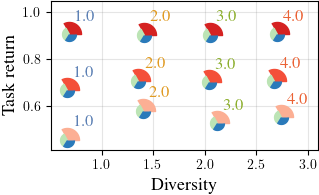

In [37]:
import itertools
import matplotlib
import numpy as np

skills = [1, 2, 3, 4, 5, 6, 7]
expert_return = [28, 36, 52]

def st(x, window=200):
    return np.convolve(x.flatten(), np.ones(window)/window, 'valid') 

idx =  (None, 0.5, 0.9, None)
sizes = [3.0, 1.0, 1.0]
rew = 0
y_name = "Task return"

# idx =  (0.9, None, 0.9, None)
# sizes = [1.0, 3.0, 1.0]
# rew = 1
# y_name = "Regularizer return"

# idx =  (0.9, 0.9, None, None)
# sizes = [1.0, 1.0, 3.0]
# rew = 2
# y_name = "Style return"

time_statistics_feature = summary.time_statistics('scalar/main/Feature/avg_nearest_dist_per_step', [idx], apply_func=st)
time_statistics_return = [summary.time_statistics(f'scalar/main/Constraint/avg_ext_values_rew{rew}_skill{skill}', [idx], apply_func=st) for skill in skills]

fig_name = f'vdw_rainbow_579_rew{rew}'


x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))

y = []
y_err = []
for i in range(len(skills)):
    y.append([time_statistics_return[i][k]['mu'][-1] for k in time_statistics_return[i]])
    y_err.append([time_statistics_return[i][k]['var'][-1] for k in time_statistics_return[i]])


y = np.array(y)
y_err = np.sqrt(np.array(y))

y = np.mean(y, axis=0).squeeze() / expert_return[rew]
y_err = np.mean(y_err, axis=0).squeeze() / expert_return[rew]


a1 = np.array([k[0] for k in time_statistics_feature.keys()])
a2 = np.array([k[1] for k in time_statistics_feature.keys()])
a3 = np.array([k[2] for k in time_statistics_feature.keys()])
l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
cmap_l0 = {
    1.0: COLORS[0],
    2.0: COLORS[1],
    3.0: COLORS[2],
    4.0: COLORS[3]
}
l0_colors = [cmap_l0[l0] for l0 in l0_values]

####################################

# random scatter plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import itertools

def scatter_pie_markers(x,y, c1, c2, c3, size=100, ax=None, scales=[1, 1, 1]):

    # first define the ratios
    r1 = 0.33       # 20%
    r2 = r1 + 0.33  # 40%

    if ax is None:
        ax = plt.gca()

    x_ = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 20)).tolist()
    y_ = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 20)).tolist()
    xy1 = np.column_stack([x_, y_])
    s1 = np.abs(xy1).max()
    print(s1)

    x_ = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 20)).tolist()
    y_ = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 20)).tolist()
    xy2 = np.column_stack([x_, y_])
    s2 = np.abs(xy2).max()
    print(s2)

    x_ = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 20)).tolist()
    y_ = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 20)).tolist()
    xy3 = np.column_stack([x_, y_])
    s3 = np.abs(xy3).max()
    print(s3)

    ax.scatter(x, y, marker=xy1,
            s=size * scales[0], facecolor=c1)
    ax.scatter(x, y, marker=xy2,
            s=size * scales[1], facecolor=c2)
    return ax.scatter(x, y, marker=xy3,
            s=size * scales[2], facecolor=c3)

fig, ax = plt.subplots()

##### change this with data #######

# x,y = np.random.rand(20), np.random.rand(20)
# y_err = np.random.rand(20) * 0.1
# x_err = np.random.rand(20) * 0.1
# a1 = np.random.rand(20)
# a2 = np.random.rand(20)
# a3 = np.random.rand(20)

# l0_colors = np.random.randint(3, size=20)
# l0_values = [1.0, 2.0, 4.0]
# l0_values = np.array([l0_values[i] for i in l0_colors])
# l0_colors = np.array([COLORS[i] for i in l0_colors])

####################################



c = COLORS[0]

cmap = matplotlib.colormaps['viridis'].resampled(8)

cmap_a1 = matplotlib.colormaps['Reds'].resampled(8)
cmap_a2 = matplotlib.colormaps['Greens'].resampled(8)
cmap_a3 = matplotlib.colormaps['Blues'].resampled(8)


for x_, y_, y_err_, x_err_, a1_, a2_, a3_, l0, l0_color in zip(x.reshape(-1, 1),y.reshape(-1,1),y_err.reshape(-1,1),x_err.reshape(-1,1), a1, a2, a3, l0_values, l0_colors):

    # plt.errorbar(x_, y_, xerr=x_err_, fmt='o', markersize=0.0, zorder=-1, c=l0_color)
    # print(a1_)
    # im = scatter_pie_markers(x_,y_, cmap(a1_), cmap(a2_), cmap(a3_), ax=ax)
    im = scatter_pie_markers(x_,y_, cmap_a1(a1_/1.4), cmap_a2(a2_/1.4), cmap_a3(a3_/1.4), ax=ax, scales=sizes)

    ax.annotate(f'{l0}', (x_+.06,  y_+.06), color=l0_color, size=12)

    # if a3_>0.4 and a3_<0.6:
    #     # ax.annotate(f'{l0}', (x_+.08,  y_-.02), color=l0_color, size=12)
    # elif a3_>0.6 and a3_<0.8:
    #     # ax.annotate(f'{l0}', (x_+.16,  y_), color=l0_color, size=12)
    # else:
    #     # ax.annotate(f'{l0}', (x_+.08,  y_+.01), color=l0_color, size=12)


ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-0.02, ymax + 0.12)

xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin-0.06, xmax + 0.26)
yunit = (ymax - ymin) / 20
xunit = (xmax - xmin) / 20


# plot heatmap of the data
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel(y_name, fontsize=13)
ax.set_xlabel("Diversity", fontsize=13)
ax.set_axisbelow(True)
ax.grid(color='gray', alpha=0.2)


norm = matplotlib.colors.Normalize(vmin=0.2, vmax=1.0)
# fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax, orientation="vertical", label="$\\alpha$")

import os

fig.savefig(os.path.expanduser(f'~/icra2023/{fig_name}.pdf'), bbox_inches='tight')



